In [ ]:
from google.colab import filesM
uploaded = files.upload()


Saving powerdemand_delhi.csv to powerdemand_delhi.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
dataset_path = "/content/drive/My Drive/Delhi Power Consumption/powerdemand_delhi.csv"  # Change this path
df = pd.read_csv(dataset_path)


In [ ]:
import pandas as pd



In [ ]:
import pandas as pd



# Drop unnecessary columns
df.drop(columns=['Unnamed: 0'], inplace=True)

# Convert 'datetime' column to datetime format
df['datetime'] = pd.to_datetime(df['datetime'], format='%m/%d/%Y %H:%M')

# Handle missing values
df['wdir'].fillna(df['wdir'].median(), inplace=True)  # Fill missing wdir with median
df['moving_avg_3'].fillna(df['moving_avg_3'].mean(), inplace=True)  # Fill missing moving_avg_3 with mean

# Check and remove duplicates if any
df.drop_duplicates(inplace=True)

# Save cleaned data (optional)
cleaned_file_path = r"/content/drive/My Drive/Delhi Power Consumption/cleanedpowerdemand.csv"
df.to_csv(cleaned_file_path, index=False)

# Display the first few rows of cleaned data
df.head()


<ipython-input-7-f7f8f76551a7>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['wdir'].fillna(df['wdir'].median(), inplace=True)  # Fill missing wdir with median
<ipython-input-7-f7f8f76551a7>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].m

,datetime,Power demand,temp,dwpt,rhum,wdir,wspd,pres,year,month,day,hour,minute,moving_avg_3
0,2021-01-01 00:30:00,2014.00,8.0,6.9,93,0.0,0.0,1017.0,2021,1,1,0,30,3960.746273
1,2021-01-01 00:35:00,2005.63,8.0,6.9,93,0.0,0.0,1017.0,2021,1,1,0,35,3960.746273
2,2021-01-01 00:40:00,1977.60,8.0,6.9,93,0.0,0.0,1017.0,2021,1,1,0,40,1999.076667
3,2021-01-01 00:45:00,1976.44,8.0,6.9,93,0.0,0.0,1017.0,2021,1,1,0,45,1986.556667
4,2021-01-01 00:50:00,1954.37,8.0,6.9,93,0.0,0.0,1017.0,2021,1,1,0,50,1969.470000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Optional: Set Seaborn style for better visuals
sns.set_style("whitegrid")


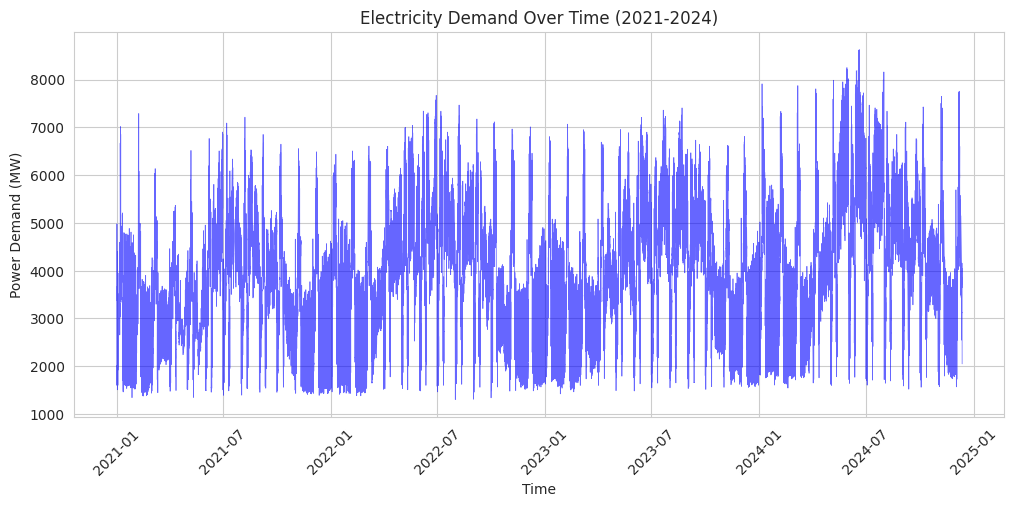

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(df['datetime'], df['Power demand'], color='blue', alpha=0.6, linewidth=0.5)
plt.xlabel("Time")
plt.ylabel("Power Demand (MW)")
plt.title("Electricity Demand Over Time (2021-2024)")
plt.xticks(rotation=45)
plt.show()


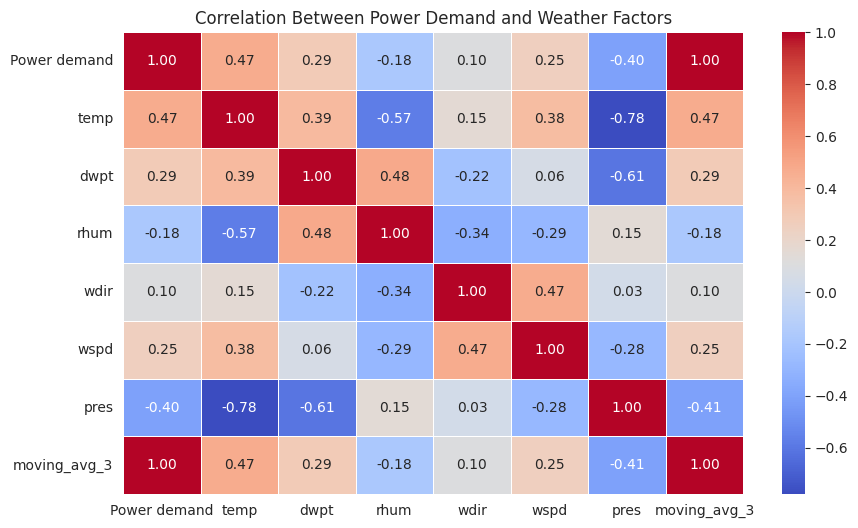

In [ ]:
corr_matrix = df[['Power demand', 'temp', 'dwpt', 'rhum', 'wdir', 'wspd', 'pres', 'moving_avg_3']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Power Demand and Weather Factors")
plt.show()

In [ ]:
import numpy as np  # Import NumPy
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

# Convert infinite values to NaN and handle missing values
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)  # Drop rows with NaN values if necessary


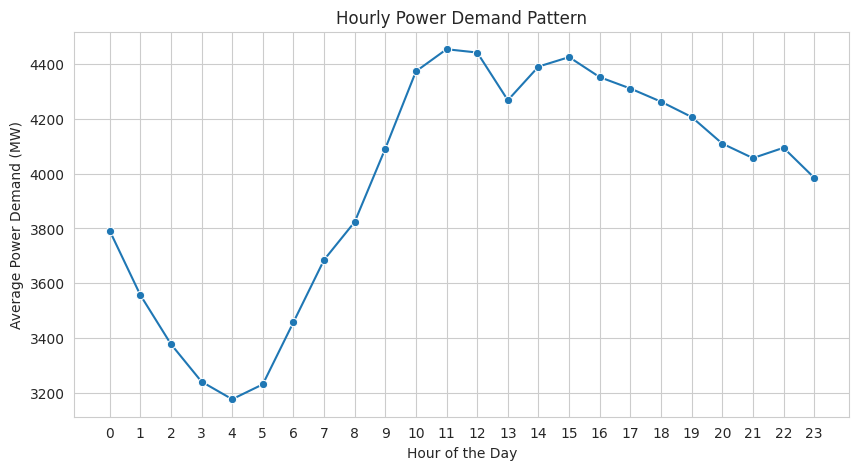

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df.groupby("hour")["Power demand"].mean().index,
             y=df.groupby("hour")["Power demand"].mean().values, marker="o")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Power Demand (MW)")
plt.title("Hourly Power Demand Pattern")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


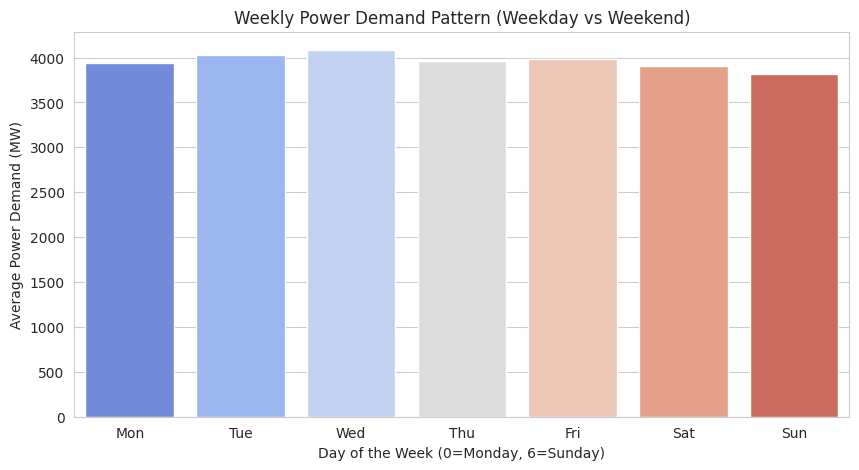

In [ ]:
# Ensure datetime column is in datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract day of the week (0=Monday, 6=Sunday)
df['day_of_week'] = df['datetime'].dt.dayofweek

# Now, rerun the plot
plt.figure(figsize=(10, 5))
sns.barplot(x=df.groupby("day_of_week")["Power demand"].mean().index,
            y=df.groupby("day_of_week")["Power demand"].mean().values, palette="coolwarm")
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)")
plt.ylabel("Average Power Demand (MW)")
plt.title("Weekly Power Demand Pattern (Weekday vs Weekend)")
plt.xticks(ticks=range(7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.show()


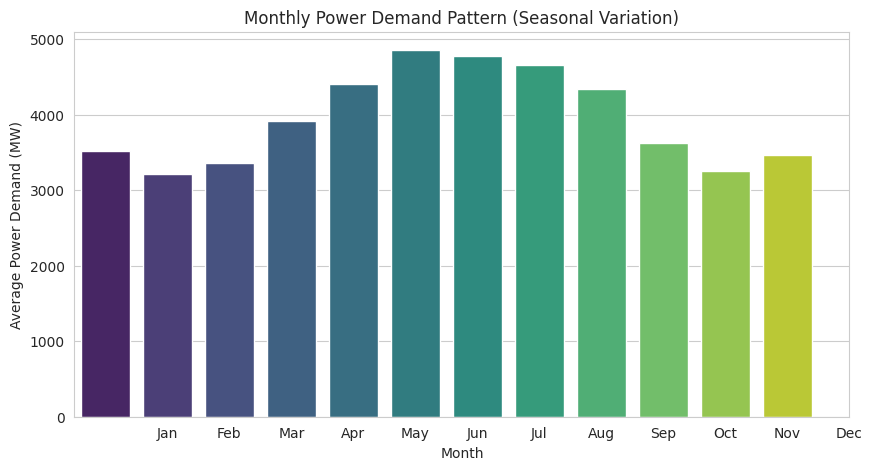

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x=df.groupby("month")["Power demand"].mean().index,
            y=df.groupby("month")["Power demand"].mean().values, palette="viridis")
plt.xlabel("Month")
plt.ylabel("Average Power Demand (MW)")
plt.title("Monthly Power Demand Pattern (Seasonal Variation)")
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun",
                                        "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract time-based features
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.dayofweek  # Monday=0, Sunday=6
df['month'] = df['datetime'].dt.month
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)  # 1 for Saturday/Sunday


In [ ]:
# Create lag features (e.g., last 1 hour, 3 hours, and 1 day)
df['lag_1'] = df['Power demand'].shift(1)  # 1 step before
df['lag_3'] = df['Power demand'].shift(3)  # 3 steps before
df['lag_24'] = df['Power demand'].shift(288)  # 1 day before (5-min intervals → 288 steps)


In [ ]:
df['rolling_avg_3'] = df['Power demand'].rolling(window=3).mean()  # 3-step moving average
df['rolling_avg_24'] = df['Power demand'].rolling(window=288).mean()  # 1-day moving average


In [ ]:
df['temp_x_demand'] = df['temp'] * df['Power demand']  # Interaction feature
df['humidity_x_demand'] = df['rhum'] * df['Power demand']


In [ ]:
df.dropna(inplace=True)  # Remove rows with NaN values


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Select only numerical columns for scaling
features = ['Power demand', 'hour', 'day_of_week', 'month', 'is_weekend',
            'lag_1', 'lag_3', 'lag_24', 'rolling_avg_3', 'rolling_avg_24',
            'temp', 'rhum', 'temp_x_demand', 'humidity_x_demand']

# Initialize MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[features])

# Convert back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=features)


In [ ]:
from sklearn.model_selection import train_test_split

# Define input (X) and target (y)
X = df_scaled.drop(columns=['Power demand'])  # Features
y = df_scaled['Power demand']  # Target variable

# Convert to NumPy arrays
X, y = np.array(X), np.array(y)

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [ ]:
# Reshape input to [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation="relu"),
    Dense(1)  # Output layer (single value prediction)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

# Print model summary
model

<Sequential name=sequential, built=True>

In [ ]:
# Train the LSTM model
history = model.fit(
    X_train, y_train,
    batch_size=32,  # Adjust batch size as needed
    epochs=50,  # Adjust epochs based on performance
    validation_data=(X_test, y_test),  # Monitor validation performance
    verbose=1
)


Epoch 1/50
9829/9829 ━━━━━━━━━━━━━━━━━━━━ 64s 6ms/step - loss: 0.0028 - val_loss: 2.5526e-04
Epoch 2/50
9829/9829 ━━━━━━━━━━━━━━━━━━━━ 76s 5ms/step - loss: 2.0471e-04 - val_loss: 2.1895e-04
Epoch 3/50
9829/9829 ━━━━━━━━━━━━━━━━━━━━ 86s 6ms/step - loss: 1.4127e-04 - val_loss: 3.6133e-04
Epoch 4/50
9829/9829 ━━━━━━━━━━━━━━━━━━━━ 77s 5ms/step - loss: 1.2155e-04 - val_loss: 3.8082e-04
Epoch 5/50
9829/9829 ━━━━━━━━━━━━━━━━━━━━ 49s 5ms/step - loss: 1.0836e-04 - val_loss: 7.1061e-04
Epoch 6/50
9829/9829 ━━━━━━━━━━━━━━━━━━━━ 58s 6ms/step - loss: 9.7308e-05 - val_loss: 6.9894e-04
Epoch 7/50
9829/9829 ━━━━━━━━━━━━━━━━━━━━ 52s 5ms/step - loss: 9.0845e-05 - val_loss: 9.0467e-04
Epoch 8/50
9829/9829 ━━━━━━━━━━━━━━━━━━━━ 51s 5ms/step - loss: 8.6917e-05 - val_loss: 0.0010
Epoch 9/50
9829/9829 ━━━━━━━━━━━━━━━━━━━━ 55s 6ms/step - loss: 8.0855e-05 - val_loss: 8.6772e-04
Epoch 10/50
9829/9829 ━━━━━━━━━━━━━━━━━━━━ 54s 6ms/step - loss: 7.9249e-05 - val_loss: 9.5499e-04
Epoch 11/50
9829/9829 ━━━━━━━━━━━━━━━

In [ ]:
# Evaluate the model on test data
test_loss = model.evaluate(X_test, y_test, verbose=1)

# Print test loss
print(f"Test Loss (MSE): {test_loss}")


2458/2458 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0026
Test Loss (MSE): 0.002285451628267765


2458/2458 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


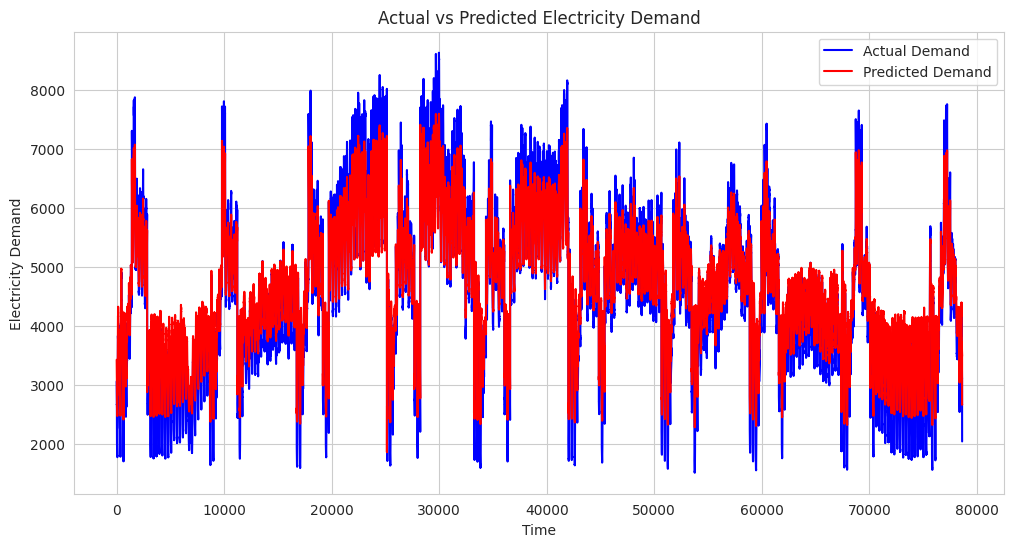

In [ ]:
import matplotlib.pyplot as plt

# Generate predictions
predictions = model.predict(X_test)

# Inverse transform predictions to original scale
# Reshape predictions and Y_test to match the expected shape



# Create a placeholder array with the same number of features (14) as the original scaling
predictions_expanded = np.zeros((predictions.shape[0], 14))  # 14 is the original feature count
predictions_expanded[:, 0] = predictions.flatten()  # Place predictions in the first column

y_test_expanded = np.zeros((y_test.shape[0], 14))
y_test_expanded[:, 0] = y_test.flatten()

# Apply inverse transform
predictions_actual = scaler.inverse_transform(predictions_expanded)[:, 0]  # Extract only the first column
Y_test_actual = scaler.inverse_transform(y_test_expanded)[:, 0]


# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(Y_test_actual, label="Actual Demand", color="blue")
plt.plot(predictions_actual, label="Predicted Demand", color="red")
plt.xlabel("Time")
plt.ylabel("Electricity Demand")
plt.title("Actual vs Predicted Electricity Demand")
plt.legend()
plt.show()


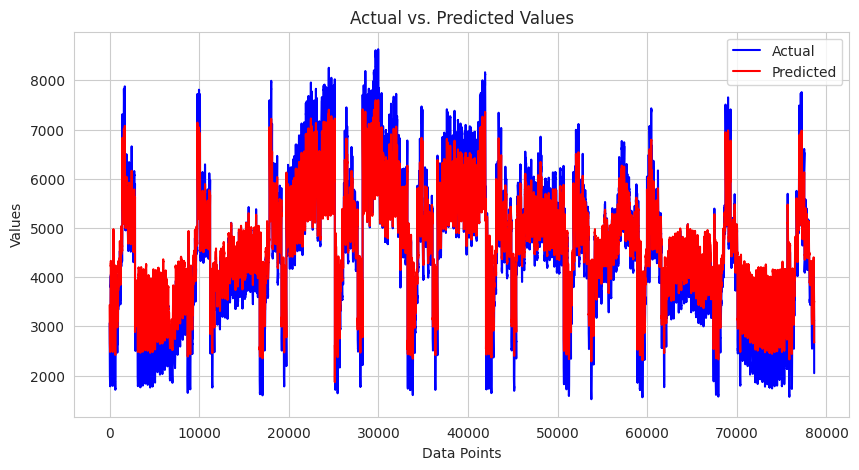

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values
plt.figure(figsize=(10, 5))
plt.plot(Y_test_actual, label="Actual", color="blue")
plt.plot(predictions_actual, label="Predicted", color="red")
plt.xlabel("Data Points")
plt.ylabel("Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
import numpy as np

In [ ]:
mae = mean_absolute_error(Y_test_actual, predictions_actual)
mse = mean_squared_error(Y_test_actual, predictions_actual)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test_actual, predictions_actual)

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 303.6706961828306
Mean Squared Error (MSE): 122776.386479569
Root Mean Squared Error (RMSE): 350.39461536897085
R² Score: 0.9355914678388164


In [ ]:
import joblib

# Save the trained model
joblib.dump(model, "trained_model.pkl")

# Save the scaler (to apply same transformations later)
joblib.dump(scaler, "scaler.pkl")

print("Model and scaler saved successfully!")


Model and scaler saved successfully!


In [ ]:
print("Training Data Columns:", scaler.feature_names_in_)
print("New Data Columns:", new_data.columns)


Training Data Columns: ['Power demand' 'hour' 'day_of_week' 'month' 'is_weekend' 'lag_1' 'lag_3'
 'lag_24' 'rolling_avg_3' 'rolling_avg_24' 'temp' 'rhum' 'temp_x_demand'
 'humidity_x_demand']
New Data Columns: Index(['Unnamed: 0', 'datetime', 'Power demand', 'temp', 'dwpt', 'rhum',
       'wdir', 'wspd', 'pres', 'year', 'month', 'day', 'hour', 'minute',
       'moving_avg_3'],
      dtype='object')


In [ ]:
import numpy as np

# Identify columns that exist in both required_columns and new_data
available_columns = list(set(required_columns) & set(new_data.columns))

# Print missing columns for debugging
missing_columns = list(set(required_columns) - set(new_data.columns))
print("Missing Columns:", missing_columns)

# Select only the available columns
new_data = new_data[available_columns]

# Convert all columns to float to avoid dtype mismatches
new_data = new_data.astype(float)

# Ensure the column order matches the original training data order
new_data = new_data.reindex(columns=required_columns, fill_value=np.nan)

# Debugging step: Check if any NaN values exist after reindexing
print("Number of NaN values after reindexing:", new_data.isna().sum().sum())

# Fill NaN values with the column mean (safer than filling with 0)
new_data.fillna(new_data.mean(), inplace=True)

# Apply the same scaling transformation
new_data_scaled = scaler.transform(new_data)


Missing Columns: []
Number of NaN values after reindexing: 0


In [ ]:
# Check shape before reshaping
print("Shape before reshaping:", new_data_scaled.shape)

# If needed, drop the extra column
new_data_scaled = new_data_scaled[:, :-1]  # Ensure correct feature count

# Reshape input to (samples, timesteps, features)
new_data_scaled = new_data_scaled.reshape((new_data_scaled.shape[0], 1, new_data_scaled.shape[1]))

# Check shape after reshaping
print("Shape after reshaping:", new_data_scaled.shape)

# Predict using the reshaped data
predictions = model.predict(new_data_scaled)


Shape before reshaping: (393440, 14)
Shape after reshaping: (393440, 1, 13)
12295/12295 ━━━━━━━━━━━━━━━━━━━━ 45s 2ms/step


In [ ]:
import numpy as np

# Step 1: Predict using the reshaped data (Already done)
predictions = model.predict(new_data_scaled)

# Step 2: Ensure the predictions have the correct shape
predictions = predictions.reshape(-1, 1)  # Make sure predictions are a 2D array

# Step 3: Apply inverse transformation to get the original values
dummy = np.zeros((predictions.shape[0], 14))  # Assuming original data had 14 features
dummy[:, -1] = predictions[:, 0]  # Place predictions in the last column

# Step 4: Inverse transform using the same scaler
dummy_original = scaler.inverse_transform(dummy)

# Step 5: Extract only the target values (last column)
predictions_original = dummy_original[:, -1]

# Step 6: Print or store the final predictions
print("Predictions in original scale:\n", predictions_original)


12295/12295 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step
Predictions in original scale:
 [1418966.13526953 1419018.46921721 1419193.2349959  ... 1075607.45844687
 1075149.51463514 1074965.60565428]


In [ ]:
predictions = model.predict(new_data_scaled)


12295/12295 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step


Predictions Summary:
Min: -185750.33375854316, Max: 1566197.552466693, Mean: 848114.0208792986


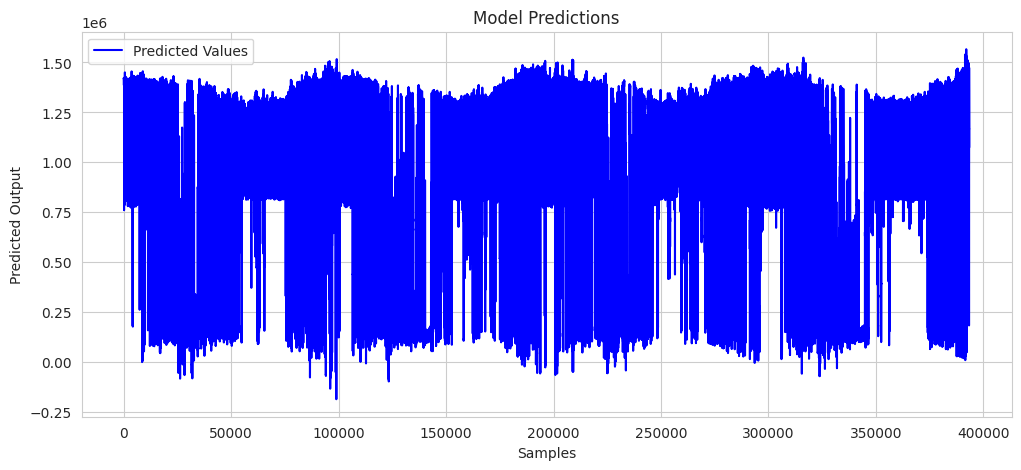

Predictions saved as predictions.csv


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Analyze predictions
print("Predictions Summary:")
print(f"Min: {predictions_original.min()}, Max: {predictions_original.max()}, Mean: {predictions_original.mean()}")

# Step 2: Visualization
plt.figure(figsize=(12, 5))
plt.plot(predictions_original, label="Predicted Values", color="blue")
plt.xlabel("Samples")
plt.ylabel("Predicted Output")
plt.title("Model Predictions")
plt.legend()
plt.show()

# Step 3: Save predictions to CSV (Optional)
df_predictions = pd.DataFrame(predictions_original, columns=["Predicted"])
df_predictions.to_csv("predictions.csv", index=False)
print("Predictions saved as predictions.csv")


print("Shape of Y_test_actual:", Y_test_actual.shape)
print("Shape of predictions_original:", predictions_original.shape)


In [ ]:
print("Shape of Y_test_actual:", Y_test_actual.shape)
print("Shape of predictions_original:", predictions_original.shape)


Shape of Y_test_actual: (78631,)
Shape of predictions_original: (393440,)


In [ ]:
predictions_original = predictions_original.flatten()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
from tensorflow.keras.models import load_model

# Load trained LSTM model
model = load_model("lstm_model.h5")

# Load the scaler
scaler = joblib.load("scaler.pkl")

# Load test data
test_data = pd.read_csv("test_data.csv")  # Ensure this file is in your Colab directory

# Scale the data
new_data_scaled = scaler.transform(test_data)

# Reshape data for LSTM input
new_data_scaled = new_data_scaled.reshape((new_data_scaled.shape[0], 1, new_data_scaled.shape[1]))

# Make predictions
predictions = model.predict(new_data_scaled)

# Inverse transform predictions to get original values
predictions_original = scaler.inverse_transform(predictions)

# Load actual values
Y_test_actual = pd.read_csv("actual_values.csv").values.reshape(-1, 1)

# Compute evaluation metrics
mae = mean_absolute_error(Y_test_actual, predictions_original)
mse = mean_squared_error(Y_test_actual, predictions_original)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test_actual, predictions_original)

# Print performance results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 5))
plt.plot(Y_test_actual, label="Actual", color="blue")
plt.plot(predictions_original, label="Predicted", color="red")
plt.title("Actual vs Predicted Electricity Demand")
plt.xlabel("Time")
plt.ylabel("Power Demand")
plt.legend()
plt.show()

# Save predictions
predictions_df = pd.DataFrame(predictions_original, columns=["Predicted Power Demand"])
predictions_df.to_csv("power_demand_predictions.csv", index=False)
print("Predictions saved successfully!")


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'lstm_model.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)